## Use barcharts and heatmaps to visualize patterns in your data
IGN Game Reviews provide scores from experts for the most recent game releases, ranging from 0 (Disaster) to 10 (Masterpiece).
<img src="https://i.imgur.com/Oh06Fu1.png">




## Load the data
1. Read the IGN data file into a dataframe named `ign_scores`.  
2. Use the `"Platform"` column to label the rows.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IGN="https://raw.githubusercontent.com/csbfx/advpy122-data/master/ign_scores.csv"
ign_scores = pd.read_csv(IGN, index_col="Platform")

## Problem 1 - (1 point)
Use the dataframe ign_scores and write one line of code to determine the highest score received by any kind of games on the Wii platform?

In [ ]:
## Your code here
ign_scores.loc['Wii'].max()

7.410344827586206

## Problem 2 - (1 point)
Use the dataframe `ign_scores` to determine which genre has the lowest score for the `PlayStation Vita` platform.

In [ ]:
## Your code here
ign_scores.loc['PlayStation Vita'].idxmin()

'Simulation'

## Problem 3 -  (2 points)
Your instructor's favorite video game has been Mario Kart Wii, a racing game released for the Wii platform in 2008. And, IGN agrees with her that it is a great game -- their rating for this game is a whopping 8.9! Inspired by the success of this game, your instructor is considering creating your very own racing game for the Wii platform. Perform the following analyses to help her determine which platform she should focus on.

1. Create a bar chart that shows the score for *Racing* games, for each platform. Your chart should have one bar for each platform. Provide a meaningful title to the plot.

2. Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, use the pandas to find out from the dataframe `ign_scores` which gaming platform is the best for racing game?

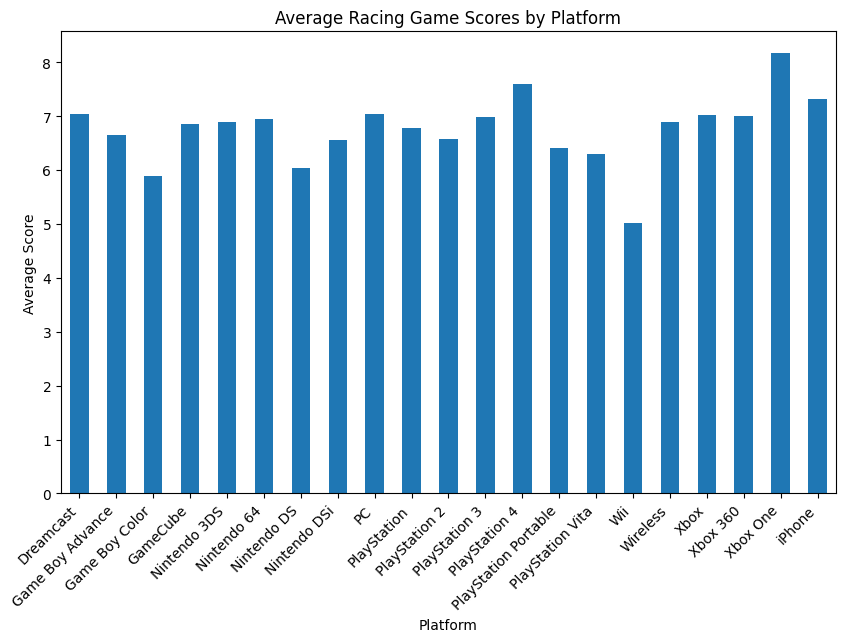

In [ ]:
# (1 point)
# Set the width and height of the figure
# Your code here . . .
ign_scores['Racing'].plot(kind='bar', figsize=(10, 6))
plt.title('Average Racing Game Scores by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
## (1 point)
## Use ign_scores to determine which gaming platform is the best
## for racing game.
## Your code here . . .
best_racing_platform = ign_scores['Racing'].idxmax()
print(f"The best platform for racing games is: {best_racing_platform}")

The best platform for racing games is: Xbox One


#### Problem 4 - (2 points)
Since your instructor's gaming interests are pretty broad, you can help her decide to use the IGN scores to determine the choice of genre and platform.

1. Create a heatmap using the IGN scores by genre and platform and include the scores in the cells of the heatmap.
2. Base on the heatmap, which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings? Write the answers in a markdown cell.

<Axes: ylabel='Platform'>

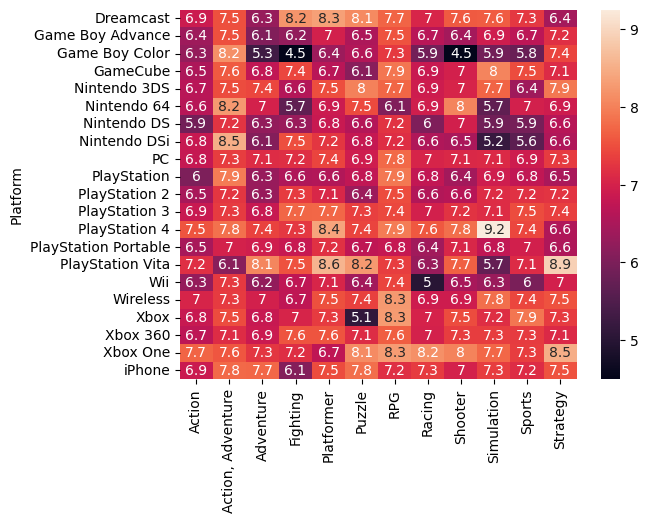

In [ ]:
## Create a heatmap
# Your code here . . .
sns.heatmap(data=ign_scores,
            annot=True
           )

The best ranking with 9.2 goes to Playstaion 4 Simulation games

## Problem 5 - (4 points)
Use the Pokemon dataset to create a clustermap with color. First, filter the dataframe to only keep data with `Type 1` equals to following values: `Water`, `Normal`, `Grass`, `Bug` and `Psychic`. Annotate the dendrogram using different colors for these five different `Type 1` values. Use `Name` as the index.

pokemon_data is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

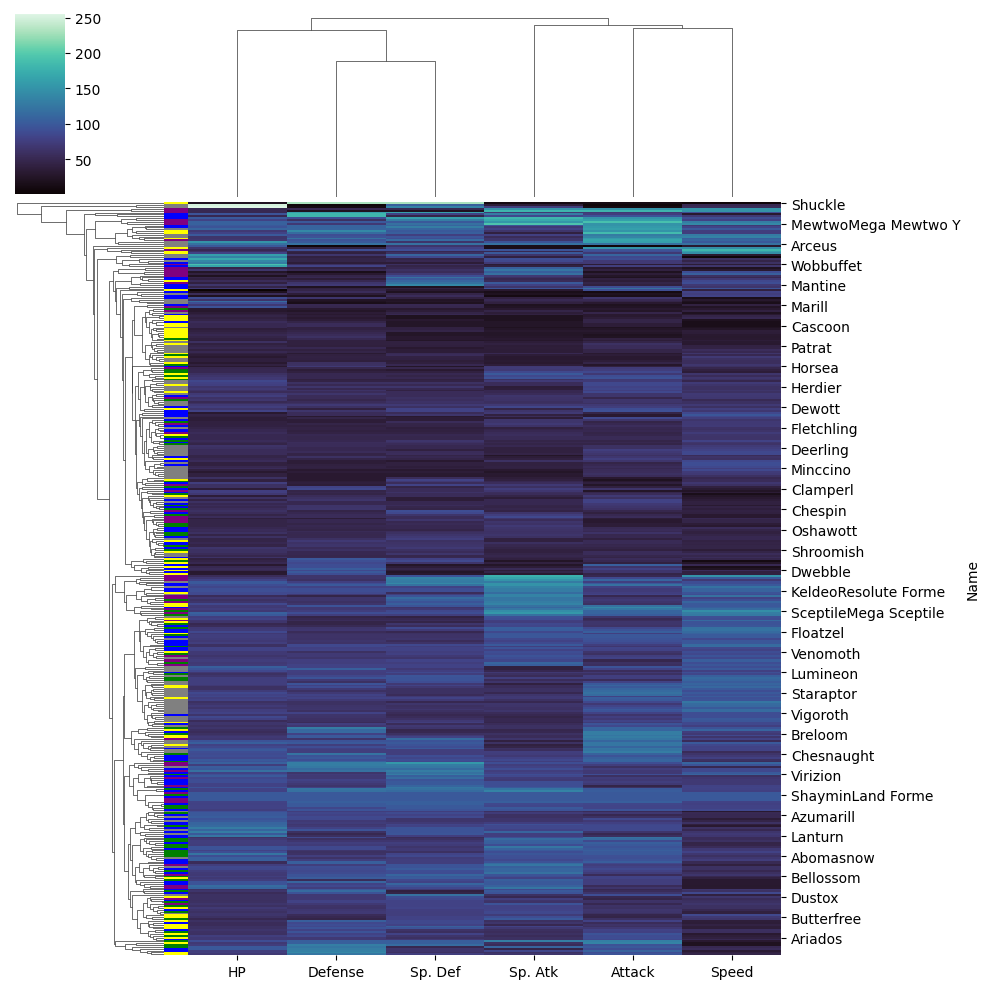

In [ ]:
#NOTE:Used Gemini to help with this step
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Problem 5
# Load the Pokemon dataset
pokemon_data_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
pokemon_data = pd.read_csv(pokemon_data_url)

# Filter the data
filtered_data = pokemon_data[pokemon_data['Type 1'].isin(['Water', 'Normal', 'Grass', 'Bug', 'Psychic'])]
filtered_data = filtered_data.set_index('Name')

# Create a dictionary for color mapping
type_colors = {
    'Water': 'blue',
    'Normal': 'gray',
    'Grass': 'green',
    'Bug': 'yellow',
    'Psychic': 'purple'
}

# Define a function to color the dendrogram
def color_dendrogram(dendrogram, type_colors):
    for i, d, c in zip(dendrogram['icoord'], dendrogram['dcoord'], dendrogram['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]

        # Get the Pokemon name corresponding to the dendrogram leaf
        # Convert i[0] to an integer before using it as an index
        pokemon_name = filtered_data.index[int(i[0]) - len(filtered_data)]

        # Get the Type 1 of the Pokemon
        pokemon_type = pokemon_data.loc[pokemon_data['Name'] == pokemon_name, 'Type 1'].iloc[0]

        # Set the color based on Type 1
        color = type_colors[pokemon_type]

        plt.plot(x, y, 'o', c=color, markersize=8)


# Create the clustermap
clustermap = sns.clustermap(filtered_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']],
                           cmap="mako",
                           row_colors=[type_colors[t] for t in filtered_data['Type 1']])

# Color the dendrogram
color_dendrogram(clustermap.dendrogram_col.dendrogram, type_colors)
plt.show()